# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import importlib
import Agent
importlib.reload(Agent)


import time

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

06:57:05


In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
brain_name
USE_MULTI_AGENT_ENV = False

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)
# print('action_size:', action_size)

# examine the state space 
states = env_info.vector_observations
print('states.shape', states.shape)
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
states.shape (2, 24)
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


In [6]:
# test_states = env_info.vector_observations 
# test_states.__class__

# next_states=[]
# next_states.append(test_states[0])
# np.asarray(all_agents_actions_next) 

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [7]:
# a = None
# b = None
# for i in range(5):                                         # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     t = 0
#     while True:
#         t += 1
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
# #         print('before actions', actions)
# #         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
# #         print('after actions', actions)
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
# #         print(i,'rewards:', rewards)
        
#         if np.any(dones):                                  # exit loop if episode finished
#             if a is None:
#                 a = actions
#             elif b is None:
#                 b = actions
# #             torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
#             break
#     print(i,'------episode done------')
    
#     print('Total score (averaged over agents) this episode: {} / max timestep {} '.format(np.mean(scores), t))

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [8]:
from collections import namedtuple, deque

def get_path(suffix):
    CHECKPOINT_PATH_ACTOR_BASE = 'checkpoint_actor{}_{}.pth' 
    CHECKPOINT_PATH_CRITIC_BASE = 'checkpoint_critic{}_{}.pth'
    actors_path = [CHECKPOINT_PATH_ACTOR_BASE.format(1, suffix),CHECKPOINT_PATH_ACTOR_BASE.format(2, suffix)]
    critics_path = [ CHECKPOINT_PATH_CRITIC_BASE.format(1, suffix),CHECKPOINT_PATH_CRITIC_BASE.format(2, suffix)]
    return (actors_path, critics_path)

def load_checkpoint(agent, path_suffix):
    actor1_path_to_load, actor2_path_to_load, critic_path_to_load = get_path(path_suffix)
    agent.actors_target[0].load_state_dict(torch.load(actor1_path_to_load))
    agent.actors_target[1].load_state_dict(torch.load(actor2_path_to_load))
    agent.actors_local[0].load_state_dict(torch.load(actor1_path_to_load))
    agent.actors_local[1].load_state_dict(torch.load(actor2_path_to_load))
    agent.critic_local.load_state_dict(torch.load(critic_path_to_load))
    agent.critic_target.load_state_dict(torch.load(critic_path_to_load))
    print('*****realoaded saved checkpoint******', actor1_path_to_load, critic_path_to_load)
   
print('ready to train')


ready to train


# Running maddpg

In [13]:
import utilities
importlib.reload(utilities)

LAST_BEST_SCORE=float('-inf')

def ddpg_ma_version(agent, n_episodes, path_to_write_suffix,apply_noise=True, eval_mode=True, start_noise=10, noise_reduction=0.9999,min_noise=0.1, max_t=1000, last_best_score=LAST_BEST_SCORE, final_scores=[]):
    actors_path,critics_path = get_path(path_to_write_suffix)
    noise = start_noise if apply_noise else 0
    noise_reduction = noise_reduction
    print('--------start learning----------')
    last_100_scores_deque = deque(maxlen=100)
    for i_episode in range(1, n_episodes+1):
#         states = env.reset()[brain_name].vector_observations
        states = env.reset(train_mode=True)[brain_name].vector_observations
        agent.reset()
        ending_t = 0
        all_agent_scores = []
        reward_this_episode = np.zeros((1, 2))
        update_iteration = 0
        for t in range(max_t):
            # make add_noise=True when early in the training stage;
            # I changed it False at the end to verify the agent solves the environemnt
            actions_for_2 = agent.act(states, noise=noise)
            noise = max(noise*noise_reduction, min_noise)
            actions_array = torch.stack(actions_for_2).detach().cpu().numpy()
            actions_for_env = np.rollaxis(actions_array,1)
            env_info= env.step(actions_for_env)[brain_name]
            next_states_for_2 = env_info.vector_observations   # get the next state
            rewards_for_2 = env_info.rewards                   # get the reward
            done_for_2 = env_info.local_done
            # if model has not been improving, then update the networks 10 times after every 20 timesteps
            agent.add_to_memory(states, actions_array, rewards_for_2, next_states_for_2, done_for_2, i_episode)
            if not eval_mode:
                update_iteration = agent.learn_and_update(i_episode, t, start_update_episode=0, ts_per_update=1 , updates_per_ts=0.2, update_iteration=update_iteration)

            reward_this_episode += rewards_for_2
            states = next_states_for_2
            all_agent_scores.append(rewards_for_2)
            if np.any(done_for_2):
                ending_t=t
                break
        c = np.vstack(all_agent_scores)
        sum_all_agent_scores = c.sum(axis=0)
        episode_max_score =  np.max(sum_all_agent_scores)
        last_100_scores_deque.append(episode_max_score)
        last_100_avg_score =  np.mean(last_100_scores_deque)
        final_scores.append(episode_max_score)
        if last_best_score < episode_max_score:
            print('[...Saving model - episode {};T {} ; episode_max={:.2f}; last_100_avg_score={:.4f} path {}'.format(i_episode,ending_t, episode_max_score, last_100_avg_score,path_to_write_suffix))
            last_best_score = episode_max_score
            for agent_i in range(2):
                torch.save(agent.maddpg_agent[agent_i].actor_local.state_dict(), actors_path[agent_i])
                torch.save(agent.maddpg_agent[agent_i].critic_local.state_dict(), critics_path[agent_i])

        if last_100_avg_score >= 0.5:
            print('\rSolved environment after {} Episodes\t Last Max Agent Score: {:.2f}'.format(i_episode, episode_max_score))
            return final_scores
        
        if last_100_avg_score <0.05 and i_episode >1500:
            print('Early return:i_episode={}; last_100_avg_score={}'.format(i_episode, last_100_avg_score))
            return


        if i_episode%100 == 0:
            print('\rEpisode {}; Ending_T {} ; episode_max: {:.12f} ; last_100_avg_score {:.4f}; Buffer {}.'.format(i_episode, ending_t, episode_max_score,last_100_avg_score, agent.memory.__len__()))
    print('----- Finish Training for {} Episodes, best score: {} | -------'.format(n_episodes, last_best_score))
    return final_scores


In [14]:
#test
from workspace_utils import active_session
import maddpg as maddpg_package
importlib.reload(maddpg_package)
import Agent
importlib.reload(Agent)
maddpg_agent = maddpg_package.MADDPG( lr_actor=2e-4, lr_critic=1e-3, state_size=state_size, action_size=action_size, random_seed=0)

with active_session():
    final_scores_train=ddpg_ma_version(agent=maddpg_agent,start_noise=5,eval_mode=False, noise_reduction=0.9999, min_noise=0.001,  n_episodes=4000, path_to_write_suffix='6_11_train_v2')
    

model_2 Critic
model_2 Critic
DDPGAgent: lr_actor=0.0002 ; lr_critic=0.001
DDPGAgent: lr_actor=0.0002 ; lr_critic=0.001
ReplayBuffer-device: cuda
--------start learning----------
[...Saving model - episode 1;T 13 ; episode_max=0.00; last_100_avg_score=0.0000 path 6_11_train_v2
[...Saving model - episode 4;T 30 ; episode_max=0.09; last_100_avg_score=0.0225 path 6_11_train_v2
[...Saving model - episode 7;T 51 ; episode_max=0.10; last_100_avg_score=0.0271 path 6_11_train_v2
[...Saving model - episode 69;T 67 ; episode_max=0.19; last_100_avg_score=0.0126 path 6_11_train_v2
Episode 100; Ending_T 14 ; episode_max: 0.000000000000 ; last_100_avg_score 0.0097; Buffer 1688.
Episode 200; Ending_T 13 ; episode_max: 0.000000000000 ; last_100_avg_score 0.0057; Buffer 3257.
Episode 300; Ending_T 13 ; episode_max: 0.000000000000 ; last_100_avg_score 0.0147; Buffer 5088.
Episode 400; Ending_T 13 ; episode_max: 0.000000000000 ; last_100_avg_score 0.0079; Buffer 6689.
Episode 500; Ending_T 13 ; episode_m

# Plot of rewards per episode

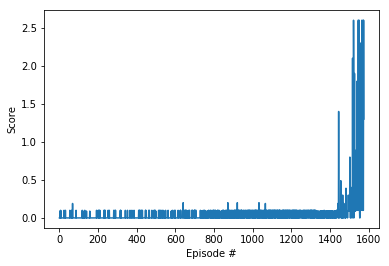

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
# ax = plt.axes()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(final_scores_train)+1), final_scores_train)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()